<h1> Exploratory data analysis</h1>
We will start with installing the huggingFace datasets

In [69]:
!pip install datasets
!pip install seaborn
!pip install matplotlib

You should consider upgrading via the 'C:\Users\imTech\Documents\GitHub\fizzbuzz\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\imTech\Documents\GitHub\fizzbuzz\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\imTech\Documents\GitHub\fizzbuzz\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [70]:
from datasets import list_datasets, load_dataset
from pprint import pprint
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

From the datasets library, we can import list_datasets to see the list of datasets available in this library. pprint module provides a capability to “pretty-print”.

In [71]:
datasets = list_datasets()
print("Number of datasets in the Datasets library: ", len(datasets), "\n\n")
#list of datasets in pretty-print format
pprint(datasets, compact=True)

Number of datasets in the Datasets library:  4232 


['assin', 'ar_res_reviews', 'ambig_qa', 'bianet', 'ag_news', 'ajgt_twitter_ar',
 'aeslc', 'bc2gm_corpus', 'air_dialogue', 'acronym_identification',
 'afrikaans_ner_corpus', 'allegro_reviews', 'ade_corpus_v2', 'adversarial_qa',
 'alt', 'billsum', 'amazon_polarity', 'amttl', 'ascent_kb', 'big_patent',
 'bn_hate_speech', 'bswac', 'capes', 'arsentd_lev', 'bible_para',
 'amazon_reviews_multi', 'ai2_arc', 'beans', 'anli', 'arabic_pos_dialect',
 'best2009', 'boolq', 'ar_sarcasm', 'asnq', 'bnl_newspapers',
 'amazon_us_reviews', 'arxiv_dataset', 'banking77', 'bookcorpus', 'bprec', 'c3',
 'allocine', 'aslg_pc12', 'biosses', 'bbc_hindi_nli', 'americas_nli', 'biomrc',
 'blimp', 'aqua_rat', 'aquamuse', 'ar_cov19', 'arabic_speech_corpus', 'arcd',
 'blended_skill_talk', 'cail2018', 'blbooksgenre', 'bookcorpusopen',
 'bsd_ja_en', 'atomic', 'autshumato', 'blog_authorship_corpus', 'caner',
 'app_reviews', 'arabic_billion_words', 'art', 'asset', 'blboo

The dataset library has 4227 datasets as of april 17, 2021. Based on that, I choose to work with the Stanford Question Answering Dataset (SQuAD) which is a reading comprehension dataset, consisting of questions posed by crowdworkers on a set of Wikipedia articles, where the answer to every question is a segment of text, or span, from the corresponding reading passage, or the question might be unanswerable.
I chose to work with this dataset, because I have always found it interesting to know how the Question Answering systems work.

In [72]:
#dataset attributes
squad = list_datasets(with_details=True)[datasets.index('squad')]
#calling the python dataclass
pprint(squad.__dict__)

{'author': None,
 'cardData': {'annotations_creators': ['crowdsourced'],
              'language_creators': ['crowdsourced', 'found'],
              'languages': ['en'],
              'licenses': ['cc-by-4-0'],
              'multilinguality': ['monolingual'],
              'paperswithcode_id': 'squad',
              'pretty_name': 'SQuAD',
              'size_categories': ['10K<n<100K'],
              'source_datasets': ['extended|wikipedia'],
              'task_categories': ['question-answering'],
              'task_ids': ['extractive-qa']},
 'citation': '@article{2016arXiv160605250R,\n'
             '       author = {{Rajpurkar}, Pranav and {Zhang}, Jian and '
             '{Lopyrev},\n'
             '                 Konstantin and {Liang}, Percy},\n'
             '        title = "{SQuAD: 100,000+ Questions for Machine '
             'Comprehension of Text}",\n'
             '      journal = {arXiv e-prints},\n'
             '         year = 2016,\n'
             '          eid 

In [73]:
squad_dataset = load_dataset('squad')

Reusing dataset squad (C:\Users\imTech\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)
100%|██████████| 2/2 [00:00<00:00, 111.05it/s]


In [74]:
print(squad_dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})


In [75]:
squad_train = load_dataset('squad', split='train')
squad_valid = load_dataset('squad', split='validation')

Reusing dataset squad (C:\Users\imTech\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)
Reusing dataset squad (C:\Users\imTech\.cache\huggingface\datasets\squad\plain_text\1.0.0\d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453)


In [76]:
print("Length of training set: ", len(squad_train))

Length of training set:  87599


In [77]:
print("First example from the dataset: \n")
pprint(squad_train[0])

First example from the dataset: 

{'answers': {'answer_start': [515], 'text': ['Saint Bernadette Soubirous']},
 'context': 'Architecturally, the school has a Catholic character. Atop the '
            "Main Building's gold dome is a golden statue of the Virgin Mary. "
            'Immediately in front of the Main Building and facing it, is a '
            'copper statue of Christ with arms upraised with the legend '
            '"Venite Ad Me Omnes". Next to the Main Building is the Basilica '
            'of the Sacred Heart. Immediately behind the basilica is the '
            'Grotto, a Marian place of prayer and reflection. It is a replica '
            'of the grotto at Lourdes, France where the Virgin Mary reputedly '
            'appeared to Saint Bernadette Soubirous in 1858. At the end of the '
            'main drive (and in a direct line that connects through 3 statues '
            'and the Gold Dome), is a simple, modern stone statue of Mary.',
 'id': '5733be284776f4190066

In [78]:
print("Features: ")
pprint(squad_train.features)
print("Column names: ", squad_train.column_names)

Features: 
{'answers': Sequence(feature={'text': Value(dtype='string', id=None), 'answer_start': Value(dtype='int32', id=None)}, length=-1, id=None),
 'context': Value(dtype='string', id=None),
 'id': Value(dtype='string', id=None),
 'question': Value(dtype='string', id=None),
 'title': Value(dtype='string', id=None)}
Column names:  ['id', 'title', 'context', 'question', 'answers']


In [79]:
print("Number of rows: ", squad_train.num_rows)
print("Number of columns: ", squad_train.num_columns)
print("Shape: ", squad_train.shape)

Number of rows:  87599
Number of columns:  5
Shape:  (87599, 5)


In [80]:
import random
from IPython.display import display, HTML
def display_random_examples(dataset=squad_train, num_examples=5):
    assert num_examples < len(dataset)

    random_picks = []
    for i in range(num_examples):
        random_pick = random.randint(0,len(dataset)-1)
        random_picks.append(random_pick)

    df = pd.DataFrame(dataset[random_picks])
    display(HTML(df.to_html()))
    return df

df = display_random_examples(squad_train, 2000)

,id,title,context,question,answers
0,5728266d3acd2414000df5a3,Federalism,"The terms 'federalism' and 'confederalism' both have a root in the Latin word foedus, meaning treaty, pact or covenant. Their common meaning until the late eighteenth century was a simple league or inter-governmental relationship among sovereign states based upon a treaty. They were therefore initially synonyms. It was in this sense that James Madison in Federalist 39 had referred to the new United States as 'neither a national nor a federal Constitution, but a composition of both' (ie. neither a single large unitary state nor a league/confederation among several small states, but a hybrid of the two). In the course of the nineteenth century the meaning of federalism would come to shift, strengthening to refer uniquely to the novel compound political form, while the meaning of confederalism would remain at a league of states. Thus, this article relates to the modern usage of the word 'federalism'.",What did James Madison referred to the new United States as?,"{'text': [''neither a national nor a federal Constitution, but a composition of both'], 'answer_start': [412]}"
1,5726a242dd62a815002e8b8c,Myanmar,"Burmese resentment was strong and was vented in violent riots that paralysed Yangon (Rangoon) on occasion all the way until the 1930s. Some of the discontent was caused by a disrespect for Burmese culture and traditions such as the British refusal to remove shoes when they entered pagodas. Buddhist monks became the vanguards of the independence movement. U Wisara, an activist monk, died in prison after a 166-day hunger strike to protest against a rule that forbade him from wearing his Buddhist robes while imprisoned.",How long was U Wisara on a strike were he refused subsistence ?,"{'text': ['166-day hunger strike'], 'answer_start': [408]}"
2,572e92b1cb0c0d14000f12da,Endangered_Species_Act,"This first list is referred to as the ""Class of '67"" in The Endangered Species Act at Thirty, Volume 1, which concludes that habitat destruction, the biggest threat to those 78 species, is still the same threat to the currently listed species. It included only vertebrates because the Department of Interior's definition of ""fish and wildlife"" was limited to vertebrates. However, with time, researchers noticed that the animals on the endangered species list still were not getting enough protection, thus further threatening their extinction. The endangered species program was expanded by the Endangered Species Act of 1969.",What is the nickname given to the first listing of endangered species?,"{'text': ['""Class of '67""'], 'answer_start': [38]}"
3,570b02646b8089140040f6c7,Lancashire,"The Red Rose of Lancaster is the county flower found on the county's heraldic badge and flag. The rose was a symbol of the House of Lancaster, immortalised in the verse ""In the battle for England's head/York was white, Lancaster red"" (referring to the 15th-century Wars of the Roses). The traditional Lancashire flag, a red rose on a white field, was not officially registered. When an attempt was made to register it with the Flag Institute it was found that it was officially registered by Montrose in Scotland, several hundred years earlier with the Lyon Office. Lancashire's official flag is registered as a red rose on a gold field.",Where can the red rose of lancaster be found?,"{'text': ['on the county's heraldic badge and flag'], 'answer_start': [53]}"
4,573017f7a23a5019007fcd5f,Iran,"Iran has an area of 1,648,195 km2 (636,372 sq mi). Iran lies between latitudes 24° and 40° N, and longitudes 44° and 64° E. Its borders are with Azerbaijan (611 km or 380 mi, with Azerbaijan-Naxcivan exclave, 179 km or 111 mi) and Armenia (35 km or 22 mi) to the north-west; the Caspian Sea to the north; Turkmenistan (992 km or 616 mi) to the north-east; Pakistan (909 km or 565 mi) and Afghanistan (936 km or 582 mi) to the east; Turkey (499 km or 310 mi) and Iraq (1,458 km or 906 mi) to the west; and fin

 Checking the types of data

In [81]:
df.dtypes

id          object
title       object
context     object
question    object
answers     object
dtype: object

Dropping the duplicate rows

In [82]:
df.shape

(2000, 5)

In [83]:
df.count()

id          2000
title       2000
context     2000
question    2000
answers     2000
dtype: int64

Dropping the missing or null values

In [84]:
print(df.isnull().sum())

id          0
title       0
context     0
question    0
answers     0
dtype: int64


In [85]:
df = df.dropna()    # Dropping the missing values.
df.count()

id          2000
title       2000
context     2000
question    2000
answers     2000
dtype: int64

In [86]:
print(df.isnull().sum())   # After dropping the values

id          0
title       0
context     0
question    0
answers     0
dtype: int64


Detecting Outliers

<AxesSubplot:>

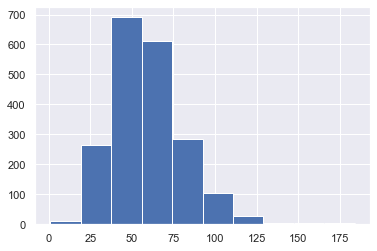

In [87]:
df['question'].str.len().hist()

let’s check the average word length in each sentence.

<AxesSubplot:>

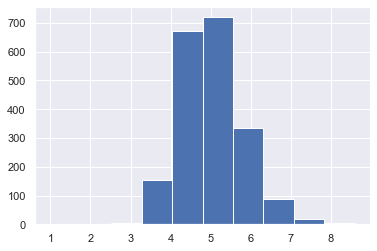

In [88]:
df['question'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

The average word length ranges between 3 to 8 with 5 being the most common length. Does it mean that people are using really short words in questions?Let’s find out.

One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data.

To get the corpus containing stopwords we can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English questions I will filter the English stopwords from the corpus.

In [89]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imTech\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now, we’ll  create the corpus.

In [90]:
corpus=[]
new= df['question'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<AxesSubplot:>

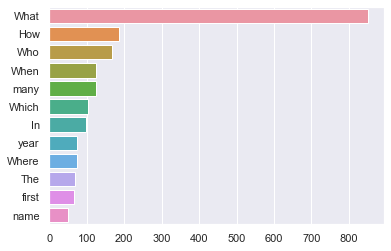

In [91]:
from collections import Counter
counter= Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

We can clearly see that the "what" dominates the question words

<h1>Ngram exploration</h1>

Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give us a better understanding of the context in which the word was used.

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

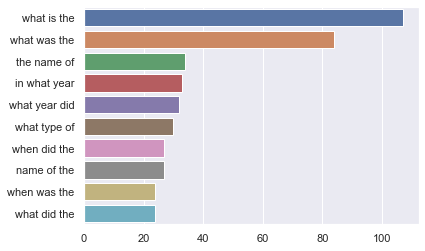

In [93]:
top_tri_grams=get_top_ngram(df['question'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

We can see that many of these trigrams are some combinations of "what is the" and “when was the”. It means that we should put some effort into data cleaning and see if we were able to combine those synonym terms into one clean token.


<h1>Wordcloud</h1>
Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.


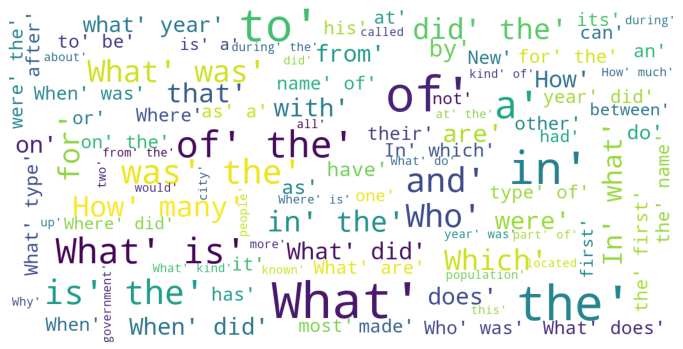

In [94]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)